In [3]:
!pip install node2vec
!pip install deepchem 
!pip install captum 
!pip install torch-geometric-temporal 

     ---------------------------------------- 24.0/24.0 MB 4.8 MB/s eta 0:00:00

You should consider upgrading via the 'C:\Users\hrida\anaconda3\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3
     -------------------------------------- 693.2/693.2 KB 4.0 MB/s eta 0:00:00
     ---------------------------------------- 20.7/20.7 MB 5.5 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\hrida\anaconda3\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 1.3/1.3 MB 2.5 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\hrida\anaconda3\python.exe -m pip install --upgrade pip' command.


     ---------------------------------------- 48.1/48.1 KB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


You should consider upgrading via the 'C:\Users\hrida\anaconda3\python.exe -m pip install --upgrade pip' command.


     -------------------------------------- 209.2/209.2 KB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 107.6/107.6 KB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 661.6/661.6 KB 3.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for torch-geometric-temporal: filename=torch_geometric_temporal-0.54.0-py3-none-any.whl size=86746 sha256=a390ae082b42cb10ae15f6c55725781644dbd8fd90301e684bf44ccec76bfc64
  Stored in directory: c:\users\hrida\a

In [48]:
pip install --upgrade numpy

     ---------------------------------------- 14.9/14.9 MB 3.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\hrida\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'C:\Users\hrida\anaconda3\python.exe -m pip install --upgrade pip' command.


In [46]:
!pip install -qU gensim

You should consider upgrading via the 'C:\Users\hrida\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
from gensim.models.word2vec import Word2Vec

C:\Users\hrida\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import networkx as nx
G=nx.Graph()
G.add_edges_from ([("A", "B"), ("A", "C"), ("B", "D"), ("B", "E"), ("C", "F"), ("C", "G")])

In [3]:
nx.is_connected(G)

True

In [4]:
G.degree["A"]

2

In [5]:
print("The degree of centrality is ", nx.degree_centrality(G))
print ("The closeness centrality is ",nx.closeness_centrality(G))
nx.betweenness_centrality(G)

The degree of centrality is  {'A': 0.3333333333333333, 'B': 0.5, 'C': 0.5, 'D': 0.16666666666666666, 'E': 0.16666666666666666, 'F': 0.16666666666666666, 'G': 0.16666666666666666}
The closeness centrality is  {'A': 0.6, 'B': 0.5454545454545454, 'C': 0.5454545454545454, 'D': 0.375, 'E': 0.375, 'F': 0.375, 'G': 0.375}


{'A': 0.6, 'B': 0.6, 'C': 0.6, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0}

In [6]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import random 
random.seed(0)

In [7]:
G=nx.erdos_renyi_graph(10,0.3,seed=1, directed=False)

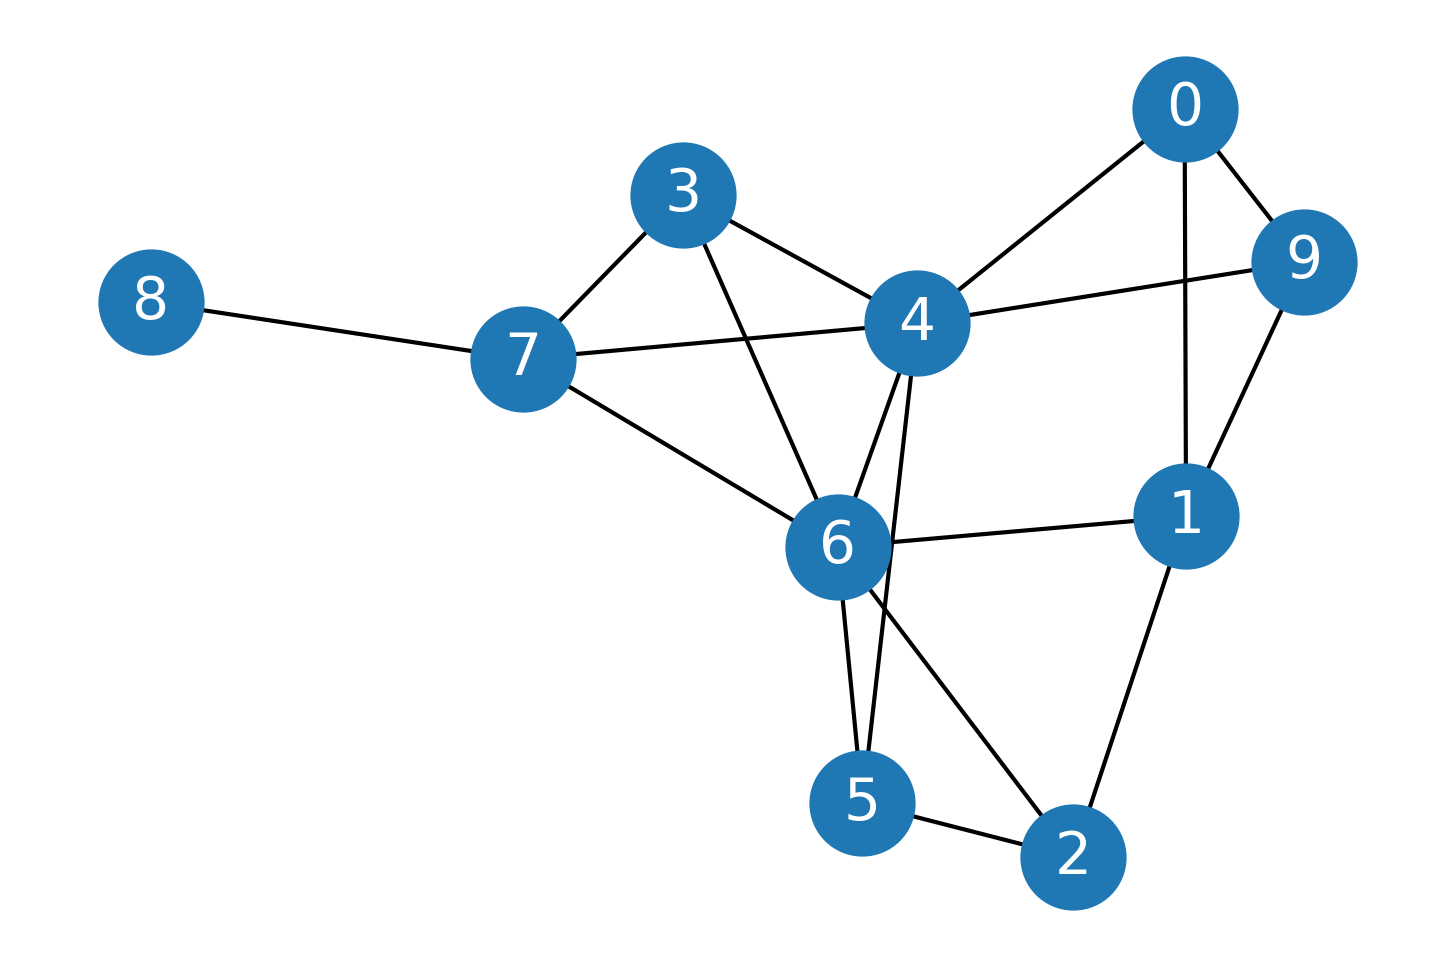

In [8]:
plt.figure(dpi=300)
plt.axis('off')
nx.draw_networkx(G, pos=nx.spring_layout(G,seed=0), node_size=600, cmap='coolwarm', font_size=14, font_color="white")

In [9]:
def random_walk(start, length):
    walk=[str(start)]
    for i in range(length):
        neighbours=[node for node in G.neighbors(start)]
        next_node=np.random.choice(neighbours,1)[0]
        walk.append(str(next_node))
        start=next_node
    return walk

In [10]:
n=[node for node in G.neighbors(2)]

In [11]:
np.random.choice(n,1)

array([1])

In [12]:
print(random_walk(0,10))

['0', '9', '4', '6', '7', '3', '6', '7', '4', '6', '2']


In [13]:
#implementing DeepWalk
G=nx.karate_club_graph()

In [14]:
labels=[]
for node in G.nodes:
    label=G.nodes[node]['club']
    labels.append(1 if label=='Officer' else 0)

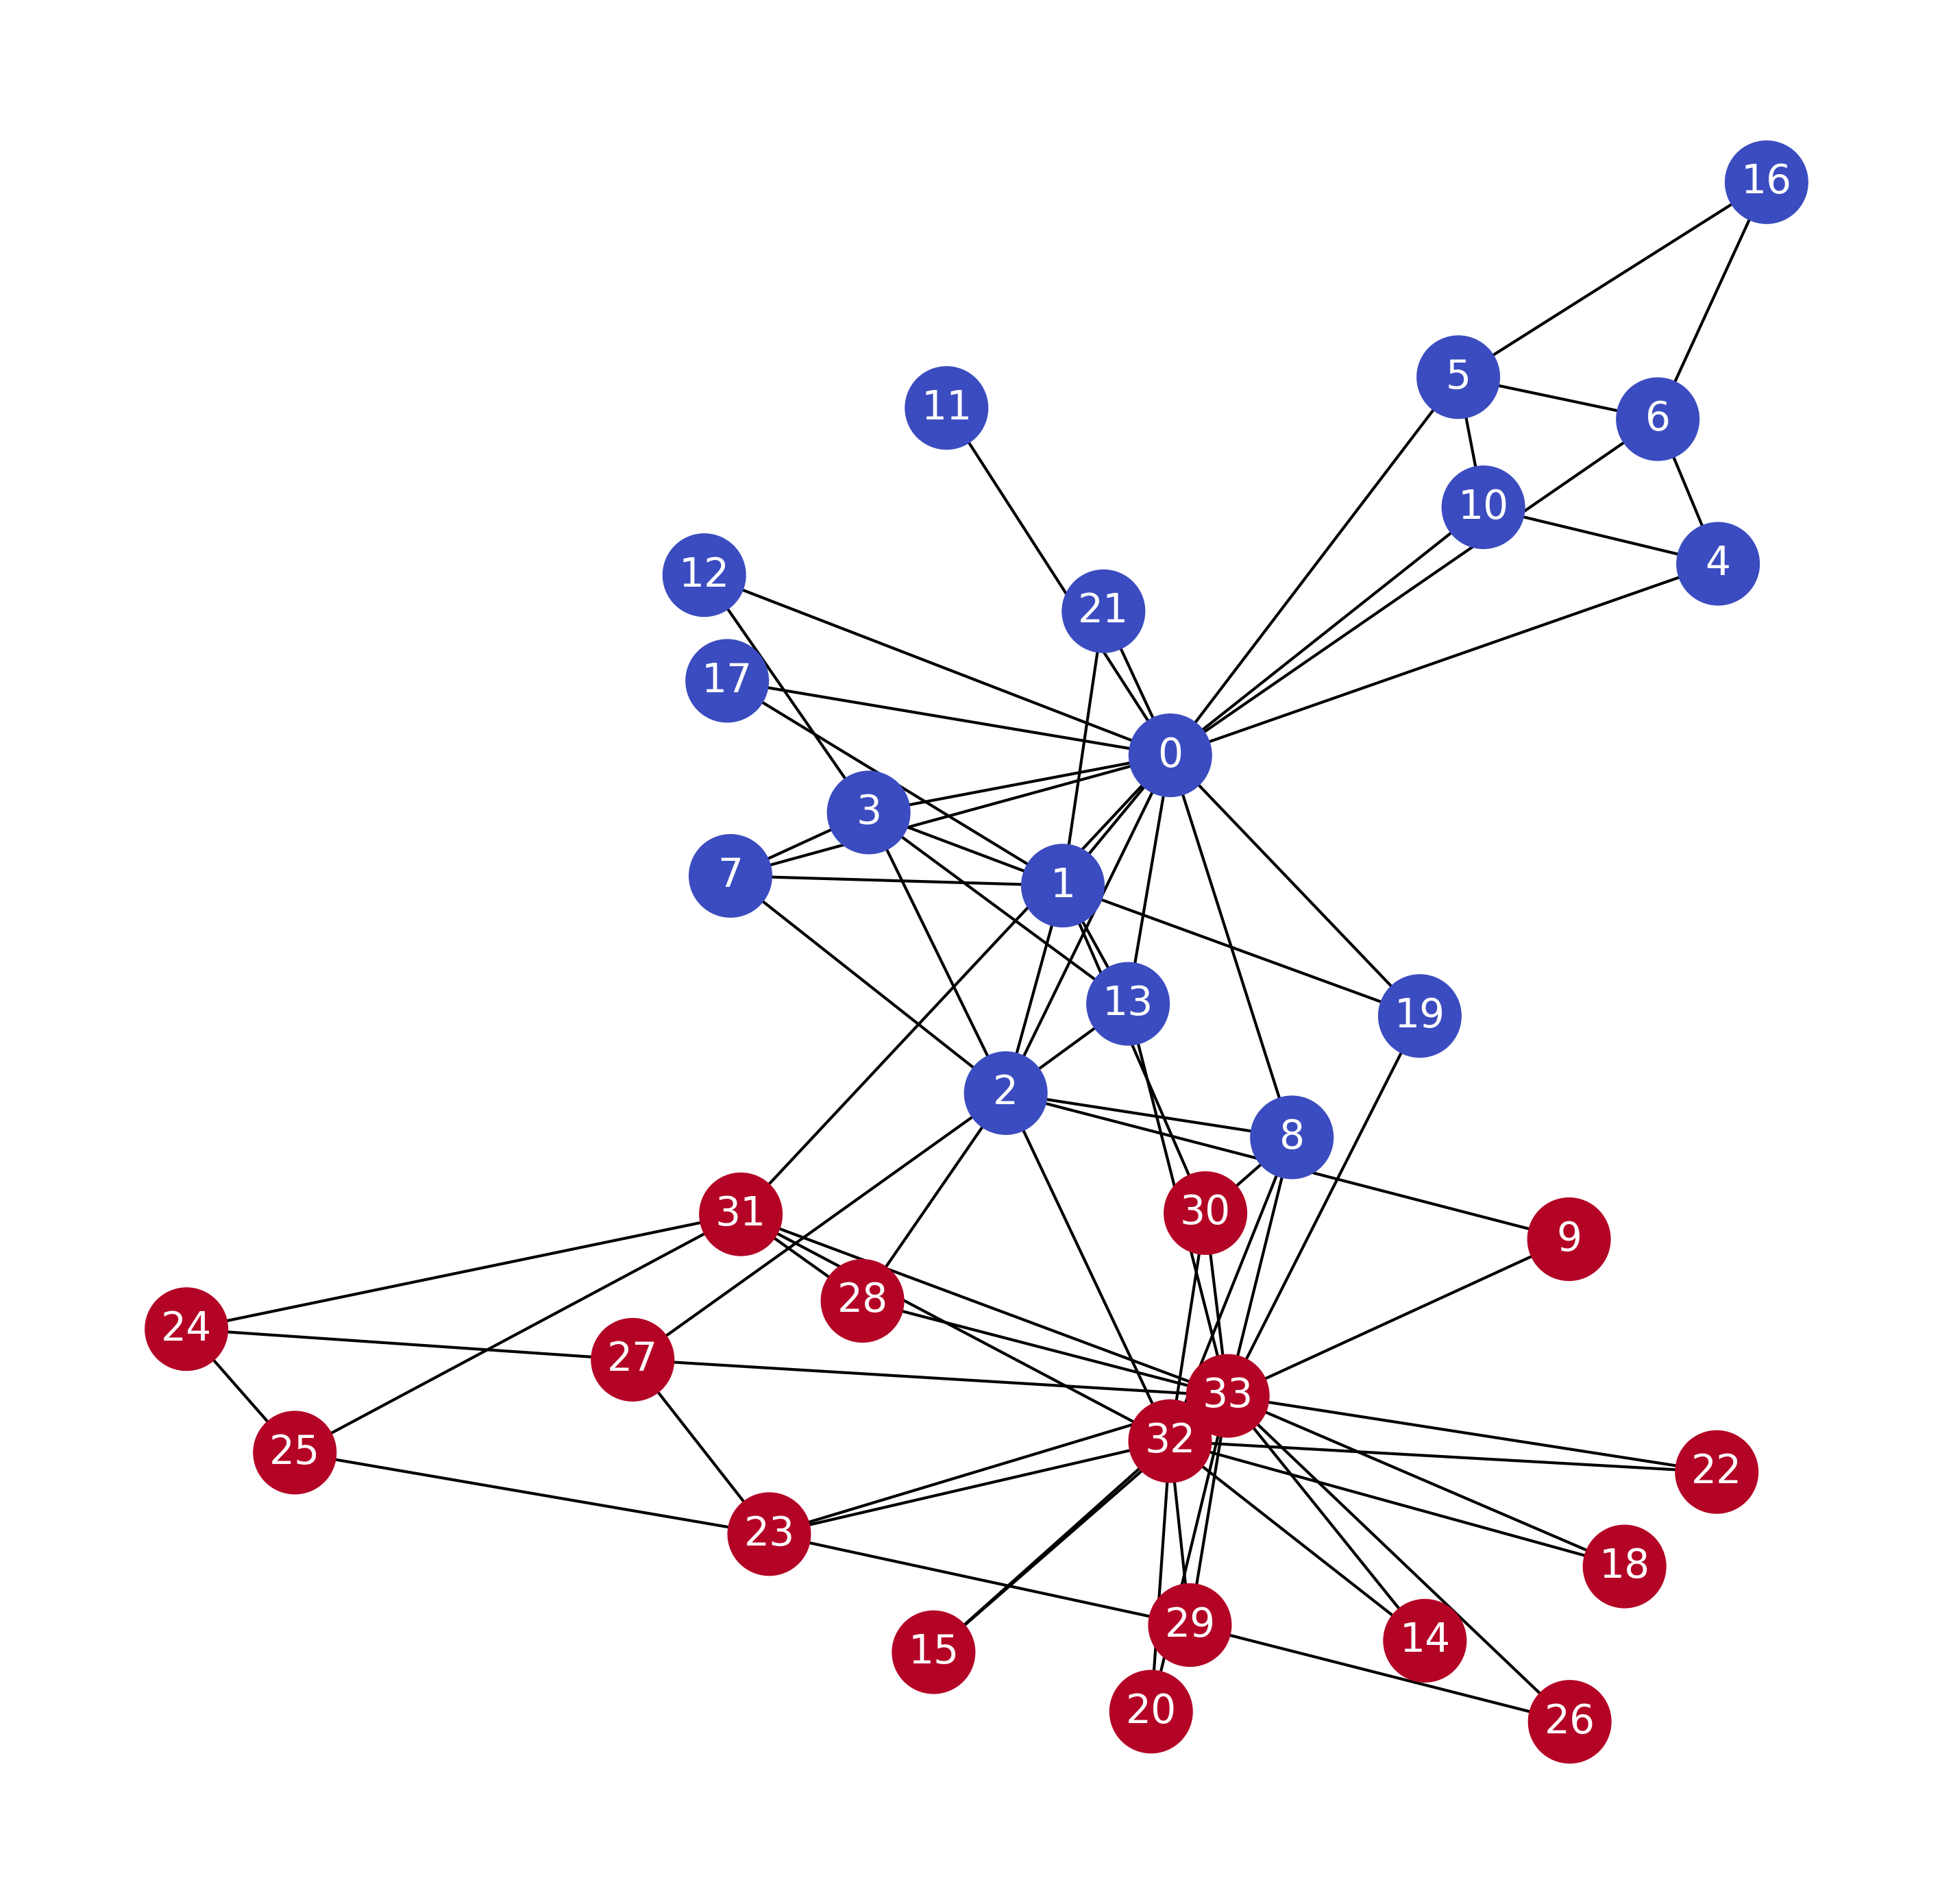

In [15]:
plt.figure(figsize=(12,12), dpi=300)
plt.axis('off')
nx.draw_networkx(G, pos=nx.spring_layout(G, seed=0), node_color=labels, node_size=800, cmap='coolwarm', font_size=14, font_color="white")

In [21]:
walks=[]
for node in G.nodes:
    for _ in range(80):
        walks.append(random_walk(node,10))

In [22]:
model=Word2Vec(walks, hs=1, sg=1, vector_size=100, window=10, workers=2, seed=0)

In [24]:
model.train(walks, total_examples=model.corpus_count, epochs=30)

(186771, 897600)

In [27]:
model.wv.similarity('0', '11')

0.53637195

In [28]:
from sklearn.manifold import TSNE

In [29]:
nodes_wv=np.array([model.wv.get_vector(str(i)) for i in range(len(model.wv))])

In [35]:
labels=np.array(labels)

In [39]:
tsne=TSNE(n_components=2, learning_rate='auto', init='pca', random_state=0).fit_transform(nodes_wv)

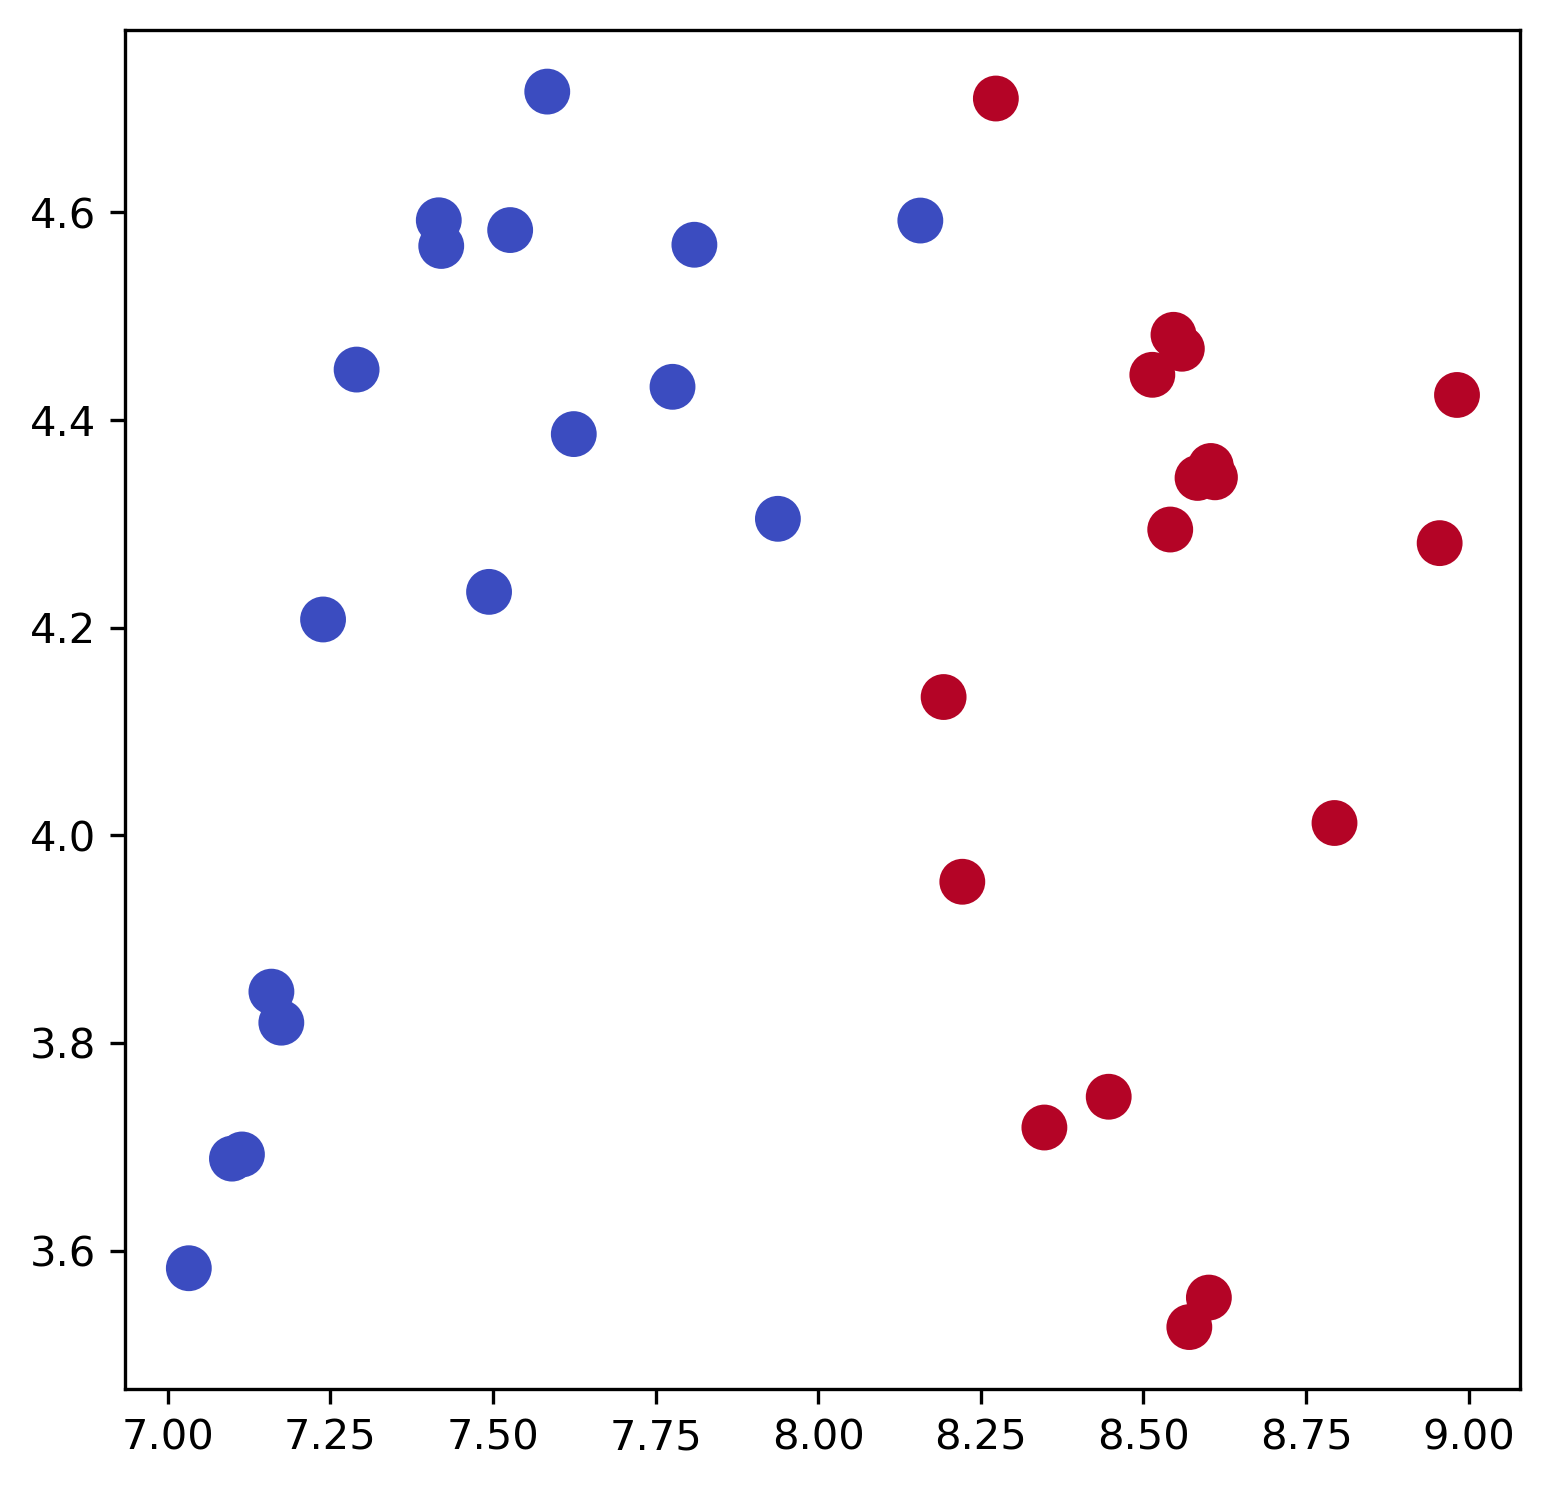

In [40]:
plt.figure(figsize=(6,6), dpi=300)
plt.scatter(tsne[:, 0], tsne[:,1], s=100, c=labels, cmap='coolwarm',)
plt.show()

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
train_mask=[2*i for i in range(0,15)]

In [45]:
net=[i for i in range(35)]

In [47]:
test_mask=list(set(net)-set(train_mask))

In [49]:
clf=RandomForestClassifier(random_state=0)

In [50]:
clf.fit(nodes_wv[train_mask], labels[train_mask])

RandomForestClassifier(random_state=0)

In [51]:
y_pred=clf.predict(nodes_wv[test_mask])
accuracy_score(y_pred, labels[test_mask])

IndexError: index 34 is out of bounds for axis 0 with size 34